> # Spam Classification

## I- Packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

from sklearn.preprocessing import PolynomialFeatures

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

# colores
c = {"d":"\033[0m","r":"\033[91m", "g":"\033[92m", "y":"\033[93m", "b":"\033[94m", "p":"\033[95m", "c":"\033[96m", "w":"\033[97m", "bl":"\033[98m"}

# %matplotlib widget
# %matplotlib tk
%matplotlib inline

## II- Data

In [8]:
data = pd.read_csv('./data/spam_email_dataset.csv')

print(f"{c['g']}data shape: {c['w']}", data.shape)
print(f"{c['g']}data columns:{c['d']}", data.columns)

data.head()

data shape:  (6000, 16)
data columns: Index(['Email', 'Subject', 'Sender', 'Recipient', 'Date', 'Time',
       'Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator'],
      dtype='object')


,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [9]:
data.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


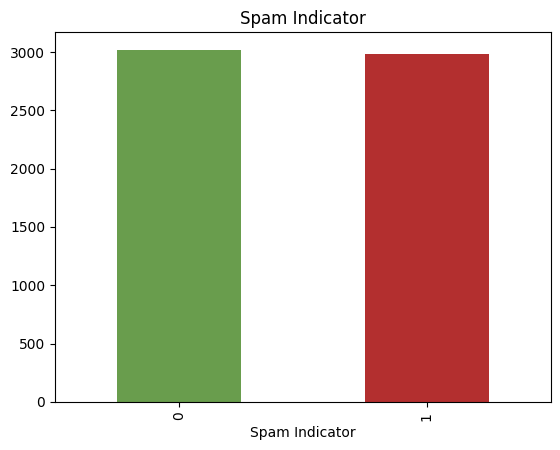

In [22]:
# plot the cnt of spam and ham emails

data['Spam Indicator'].value_counts().plot(kind='bar',color=["#699D4D", "#B32F2F"])
plt.title('Spam Indicator')
plt.show()


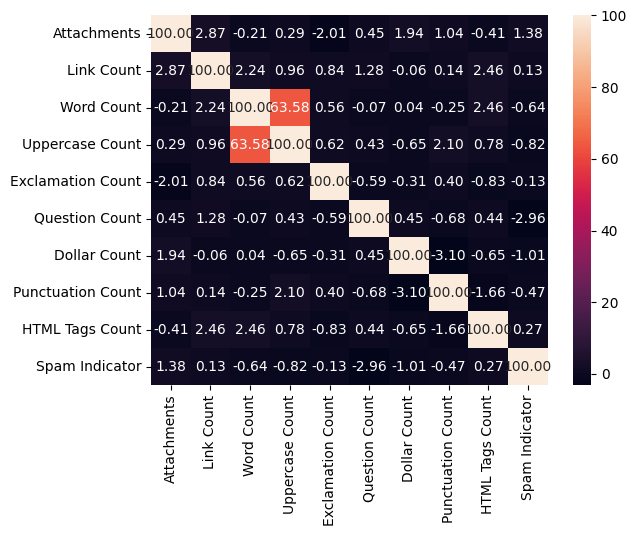

In [6]:
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr()*100, annot=True, fmt=".2f")
plt.show()

In [31]:
print(len(data['Email'].unique()))
print(len(data['Subject'].unique()))
print(len(data['Sender'].unique()))
print(len(data['Recipient'].unique()))
print(f"{c['g']}over {data.shape}")

over (6000, 16)
